# 정보시스템설계 및 실습 기말과제
##### 학번: 201320475
##### 이름: 이혁주
##### 학과: 산업공학과
## Problem 1.

In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM, Dropout, SimpleRNN
from keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras

from sklearn.model_selection import train_test_split
%matplotlib inline
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

Using TensorFlow backend.


In [2]:
class Analysis():
    def __init__(self):
        np.random.seed(42)
        tf.set_random_seed(42)
        
        #데이터 셋 생성
    def create_dataset(self, num = 5000):
        if num % 2 == 1:
            return None
        data_len = int(num / 2)
        return np.random.random(num).reshape(data_len , 2)
        # 데이터 플로팅
    def plot_data(self, data):
        if len(data.shape) != 2 :
            print('데이터를 확인해주세요.')
            return
        plt.figure(figsize=(7, 7))
        plt.plot(data[:, 0], data[:, 1], 'b.')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.grid(True)
        plt.show()
        
        # 데이터 분류
    def classify_data(self, data):
        target = []
        for i in range(len(data)):
            if data[i,0] < 0.5 and data[i,1] < 0.5:
                target.append('type1')
            elif data[i,0] >= 0.5 and data[i,1] < 0.5:
                target.append('type2')
            elif data[i,0] < 0.5 and data[i,1] >= 0.5:
                target.append('type3')
            elif data[i,0] >= 0.5 and data[i,0]<0.75 and data[i,1] >= 0.5 and data[i,1]<0.75:
                target.append('type4')
            elif data[i,0] >= 0.5 and data[i,0]<0.75 and data[i,1] >= 0.75 :
                target.append('type5')      
            elif data[i,0] >= 0.75  and data[i,1] >= 0.5 and data[i,1]<0.75:
                target.append('type6')
            elif data[i,0] >= 0.75 and  data[i,1] >= 0.75 :
                target.append('type7')
        return np.array(target)
    
        # 데이터 인코딩
    def encode_data(self, target):
        encoder = LabelBinarizer()
        encoded_target = encoder.fit_transform(target)
        return encoded_target
        
        # ratio를 이용한 train test 데이터 구분
    def get_train_And_test(self, data, target, ratio = 0.8):
        if ratio > 1 :
            print('파라미터를 확인해주세요')
            return 
        df_data = pd.DataFrame(data)
        df_encoded_target = pd.DataFrame(encoded_target)
        df_target = pd.DataFrame(target)
        df = pd.concat([df_data, df_encoded_target, df_target], axis=1)
        df.columns = ['x', 'y', '1', '2', '3', '4', '5', '6', '7', 'target']
        
        df_type1 = df[df['target'] == 'type1']
        df_type2 = df[df['target'] == 'type2']
        df_type3 = df[df['target'] == 'type3']
        df_type4 = df[df['target'] == 'type4']
        df_type5 = df[df['target'] == 'type5']
        df_type6 = df[df['target'] == 'type6']
        df_type7 = df[df['target'] == 'type7']
        
        criteria1 = int((len(df_type1) * ratio))
        train_type1 = df_type1[0 : criteria1]
        test_type1 =  df_type1[criteria1 : ]
        
        criteria2 = int((len(df_type2) * ratio))
        train_type2 = df_type2[0 : criteria2]
        test_type2 =  df_type2[criteria2 : ]
        
        criteria3 = int((len(df_type3) * ratio))
        train_type3 = df_type3[0 : criteria3]
        test_type3 =  df_type3[criteria3 : ]
        
        criteria4 = int((len(df_type4) * ratio))
        train_type4 = df_type4[0 : criteria4]
        test_type4 =  df_type4[criteria4 : ]
        
        criteria5 = int((len(df_type5) * ratio))
        train_type5 = df_type5[0 : criteria5]
        test_type5 =  df_type5[criteria5 : ]
        
        criteria6 = int((len(df_type6) * ratio))
        train_type6 = df_type6[0 : criteria6]
        test_type6 =  df_type6[criteria6 : ]
        
        criteria7 = int((len(df_type7) * ratio))
        train_type7 = df_type7[0 : criteria7]
        test_type7 =  df_type7[criteria7 : ]
        
        df_train = np.array(pd.concat([train_type1, train_type2, train_type3, train_type4, train_type5, train_type6, train_type7]))
        df_test = np.array(pd.concat([test_type1, test_type2, test_type3, test_type4, test_type5, test_type6, test_type7]))
        
        np.random.shuffle(df_train)
        np.random.shuffle(df_test)
        
        return df_train, df_test
        
        # 모델 생성
    def create_model(self, x_train, t_train, activation, epoch_num = 60, batch_num = 16):
        model = Sequential()
        model.add(Dense(16, input_dim = 2, activation = activation ))
        model.add(Dense(16, activation = activation ))
        model.add(Dense(7, activation = 'softmax'))
        model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.Adam(lr=0.01), metrics = ['accuracy'])
        hist = model.fit(x_train, t_train, epochs = epoch_num, batch_size = batch_num)
        return model, hist
    
        # history 플로팅
    def plot_history(self, hist):
        plt.figure(figsize = (15, 5))
        plt.plot(hist.history['loss'], 'y', label = 'loss')
        plt.plot(hist.history['acc'], 'b', label = 'acc')
        plt.xlabel('epoch')
        plt.legend(loc = 'best')
        plt.show()
        
        # test 예측
    def predict(self, model, test_X):
        model_pred = model.predict(test_X)
        label = np.zeros((model_pred.shape[0], model_pred.shape[1]))
        for index, value in enumerate(model_pred):
            label[index, (np.argmax(value))] = 1
        
        return label
    
        
    def get_accuracy(self, data_pred, test_Y):
        
        error = 0
        for i, value in enumerate(data_pred == test_Y):
            if False in value:
                error += 1

        accuracy = round(100 - error/(len(test_Y)), 10)
        print(accuracy, '%')
        
        return accuracy

    

### 1. model_relu_500 & model_sigmoid_500

In [3]:
analysis_500 = Analysis()

### create_dataset

In [4]:
data = analysis_500.create_dataset(4000)
print(data[0 : 5])
print(data.shape)

[[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]
 [0.05808361 0.86617615]
 [0.60111501 0.70807258]]
(2000, 2)


### plot_data

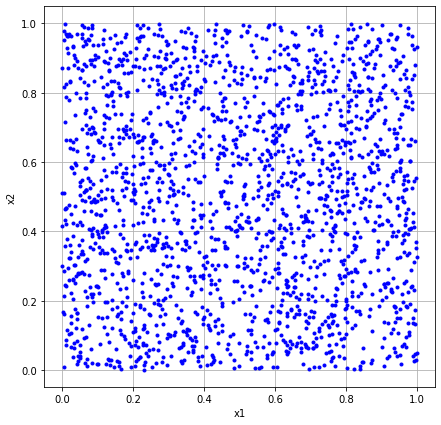

In [5]:
analysis_500.plot_data(data)

### classify_data

In [6]:
target = analysis_500.classify_data(data)
print(target[0 : 30])
print(data[0:10])

['type3' 'type4' 'type1' 'type3' 'type4' 'type3' 'type2' 'type1' 'type3'
 'type1' 'type2' 'type1' 'type3' 'type3' 'type2' 'type2' 'type3' 'type7'
 'type1' 'type2' 'type1' 'type3' 'type3' 'type3' 'type2' 'type7' 'type7'
 'type5' 'type1' 'type1']
[[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]
 [0.05808361 0.86617615]
 [0.60111501 0.70807258]
 [0.02058449 0.96990985]
 [0.83244264 0.21233911]
 [0.18182497 0.18340451]
 [0.30424224 0.52475643]
 [0.43194502 0.29122914]]


In [7]:
for i in range(1,8):
    print(len(target[target=='type' + str(i)]))

499
496
503
132
114
132
124


### encode_data

In [8]:
encoded_target = analysis_500.encode_data(target)
print(encoded_target[0:10])

[[0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0]]


### get_train_And_test

test[1000]개는 고정이므로 따로 생성한 후에, train을 위한 train[500] 추가로 생성

In [9]:
_, test_1000 = analysis_500.get_train_And_test(data, target, ratio = 0.5)

In [10]:
print(test_1000.shape) # 각 클래스 별 80%의 개수로 분리하면서 생긴 오차. 고정인 test[1000]만 사용할 것 

(1001, 10)


In [11]:
test_1000_X = np.float32(test_1000[:, :2])
test_1000_y = np.float32(test_1000[:, 2:9])

In [12]:
train_500, _ = analysis_500.get_train_And_test(data, target, ratio = 0.25)
print(train_500.shape)

(498, 10)


In [13]:
train_500[:, 2:9]

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=object)

In [14]:
train_500_X = np.float32(train_500[:, :2])
train_500_y = np.float32(train_500[:, 2:9])

### create_model 1: relu_500

In [15]:
model_relu_500, model_relu_500_hist = analysis_500.create_model(train_500_X, train_500_y, activation = 'relu', epoch_num=100, batch_num=16)

W1221 19:05:54.740427  8696 deprecation_wrapper.py:119] From C:\Anaconda_\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1221 19:05:54.743420  8696 deprecation_wrapper.py:119] From C:\Anaconda_\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1221 19:05:54.748405  8696 deprecation_wrapper.py:119] From C:\Anaconda_\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1221 19:05:54.859110  8696 deprecation_wrapper.py:119] From C:\Anaconda_\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1221 19:05:54.873072  8696 deprecation_wrapper.py:119] From C:\Anaconda_\lib\site-packages\keras\backend\tensorflow_backend.py:

Epoch 1/100
498/498 [==============================] - 0s 687us/step - loss: 1.7703 - acc: 0.2631
Epoch 2/100
498/498 [==============================] - 0s 99us/step - loss: 1.4505 - acc: 0.4900
Epoch 3/100
498/498 [==============================] - 0s 121us/step - loss: 0.9777 - acc: 0.6386
Epoch 4/100
498/498 [==============================] - 0s 120us/step - loss: 0.6257 - acc: 0.7912
Epoch 5/100
498/498 [==============================] - 0s 118us/step - loss: 0.4786 - acc: 0.8233
Epoch 6/100
498/498 [==============================] - 0s 110us/step - loss: 0.3904 - acc: 0.8835
Epoch 7/100
498/498 [==============================] - 0s 126us/step - loss: 0.3601 - acc: 0.8775
Epoch 8/100
498/498 [==============================] - 0s 101us/step - loss: 0.3055 - acc: 0.8956
Epoch 9/100
498/498 [==============================] - 0s 114us/step - loss: 0.2665 - acc: 0.9217
Epoch 10/100
498/498 [==============================] - 0s 122us/step - loss: 0.2444 - acc: 0.9257
Epoch 11/100
498/498

In [16]:
pred_model_relu_500 = analysis_500.predict(model_relu_500, test_1000_X)

In [17]:
accuracy_model_relu_500 = analysis_500.get_accuracy(pred_model_relu_500, test_1000_y)

99.9440559441 %


### create_model 2: sigmoid_500

In [18]:
model_sigmoid_500, model_sigmoid_500_hist = analysis_500.create_model(train_500_X, train_500_y, activation = 'sigmoid', epoch_num=100, batch_num=16)

Epoch 1/100
498/498 [==============================] - 0s 696us/step - loss: 1.8053 - acc: 0.2390
Epoch 2/100
498/498 [==============================] - 0s 94us/step - loss: 1.7213 - acc: 0.3293
Epoch 3/100
498/498 [==============================] - 0s 107us/step - loss: 1.6910 - acc: 0.3795
Epoch 4/100
498/498 [==============================] - 0s 150us/step - loss: 1.6315 - acc: 0.4980
Epoch 5/100
498/498 [==============================] - 0s 118us/step - loss: 1.4805 - acc: 0.5803
Epoch 6/100
498/498 [==============================] - 0s 122us/step - loss: 1.2773 - acc: 0.6024
Epoch 7/100
498/498 [==============================] - 0s 125us/step - loss: 1.0501 - acc: 0.6948
Epoch 8/100
498/498 [==============================] - 0s 124us/step - loss: 0.8692 - acc: 0.7108
Epoch 9/100
498/498 [==============================] - 0s 122us/step - loss: 0.7312 - acc: 0.7631
Epoch 10/100
498/498 [==============================] - 0s 100us/step - loss: 0.6328 - acc: 0.7892
Epoch 11/100
498/498

In [19]:
pred_model_sigmoid_500 = analysis_500.predict(model_sigmoid_500, test_1000_X)
accuracy_model_sigmoid_500 = analysis_500.get_accuracy(pred_model_sigmoid_500, test_1000_y)

99.979020979 %


### 2. model_relu_5000 & model_sigmoid_5000

In [20]:
analysis_5000 = Analysis()

### create_dataset

In [21]:
data = analysis_5000.create_dataset(20000)
print(data[0 : 5])
print(data.shape)

[[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]
 [0.05808361 0.86617615]
 [0.60111501 0.70807258]]
(10000, 2)


### plot_data

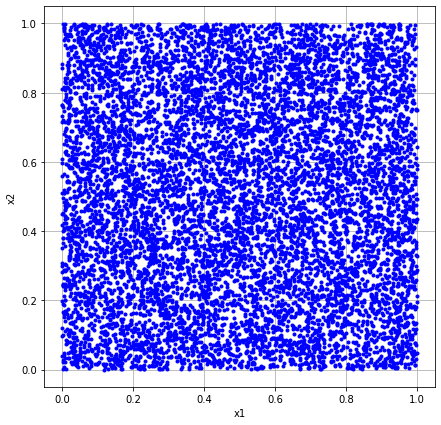

In [22]:
analysis_5000.plot_data(data)

### classify_data

In [23]:
target = analysis_5000.classify_data(data)
print(target[0 : 30])
print(data[0:10])

['type3' 'type4' 'type1' 'type3' 'type4' 'type3' 'type2' 'type1' 'type3'
 'type1' 'type2' 'type1' 'type3' 'type3' 'type2' 'type2' 'type3' 'type7'
 'type1' 'type2' 'type1' 'type3' 'type3' 'type3' 'type2' 'type7' 'type7'
 'type5' 'type1' 'type1']
[[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]
 [0.05808361 0.86617615]
 [0.60111501 0.70807258]
 [0.02058449 0.96990985]
 [0.83244264 0.21233911]
 [0.18182497 0.18340451]
 [0.30424224 0.52475643]
 [0.43194502 0.29122914]]


In [24]:
for i in range(1,8):
    print(len(target[target=='type' + str(i)]))

2505
2493
2509
628
643
605
617


### encode_data

In [25]:
encoded_target = analysis_5000.encode_data(target)
print(encoded_target[0:10])

[[0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0]]


### get_train_And_test
train을 위한 train[5000] 추가로 생성

In [26]:
train_5000, _ = analysis_5000.get_train_And_test(data, target, ratio = 0.5)
print(train_5000.shape)

(4997, 10)


In [27]:
train_5000[:, 2:9]

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=object)

In [28]:
train_5000_X = np.float32(train_5000[:, :2])
train_5000_y = np.float32(train_5000[:, 2:9])

### create_model 3: relu_5000

In [29]:
model_relu_5000, model_relu_5000_hist = analysis_5000.create_model(train_5000_X, train_5000_y, activation = 'relu', epoch_num=100, batch_num=16)

Epoch 1/100
4997/4997 [==============================] - 1s 150us/step - loss: 0.6121 - acc: 0.7967
Epoch 2/100
4997/4997 [==============================] - 0s 85us/step - loss: 0.1752 - acc: 0.9372
Epoch 3/100
4997/4997 [==============================] - 0s 91us/step - loss: 0.1395 - acc: 0.9470
Epoch 4/100
4997/4997 [==============================] - 1s 110us/step - loss: 0.1284 - acc: 0.9476
Epoch 5/100
4997/4997 [==============================] - 0s 89us/step - loss: 0.1203 - acc: 0.9508
Epoch 6/100
4997/4997 [==============================] - 0s 86us/step - loss: 0.1144 - acc: 0.9524
Epoch 7/100
4997/4997 [==============================] - 0s 88us/step - loss: 0.1051 - acc: 0.9580
Epoch 8/100
4997/4997 [==============================] - 0s 100us/step - loss: 0.0989 - acc: 0.9596
Epoch 9/100
4997/4997 [==============================] - 0s 89us/step - loss: 0.0902 - acc: 0.9618
Epoch 10/100
4997/4997 [==============================] - 0s 88us/step - loss: 0.0947 - acc: 0.9624
Epoch 

In [30]:
pred_model_relu_5000 = analysis_5000.predict(model_relu_5000, test_1000_X)
accuracy_model_relu_5000 = analysis_5000.get_accuracy(pred_model_relu_5000, test_1000_y)

99.955044955 %


### create_model 4: sigmoid_5000

In [31]:
model_sigmoid_5000, model_sigmoid_5000_hist = analysis_5000.create_model(train_5000_X, train_5000_y, activation = 'sigmoid', epoch_num=100, batch_num=16)

Epoch 1/100
4997/4997 [==============================] - 1s 164us/step - loss: 1.4033 - acc: 0.5247
Epoch 2/100
4997/4997 [==============================] - 0s 95us/step - loss: 0.4648 - acc: 0.8587
Epoch 3/100
4997/4997 [==============================] - 0s 86us/step - loss: 0.2820 - acc: 0.9202
Epoch 4/100
4997/4997 [==============================] - 0s 88us/step - loss: 0.2083 - acc: 0.9382
Epoch 5/100
4997/4997 [==============================] - 0s 90us/step - loss: 0.1685 - acc: 0.9488
Epoch 6/100
4997/4997 [==============================] - 0s 94us/step - loss: 0.1445 - acc: 0.9562
Epoch 7/100
4997/4997 [==============================] - 0s 87us/step - loss: 0.1293 - acc: 0.9558
Epoch 8/100
4997/4997 [==============================] - 0s 95us/step - loss: 0.1126 - acc: 0.9630
Epoch 9/100
4997/4997 [==============================] - 0s 96us/step - loss: 0.1080 - acc: 0.9652
Epoch 10/100
4997/4997 [==============================] - 1s 106us/step - loss: 0.0974 - acc: 0.9658
Epoch 1

In [32]:
pred_model_sigmoid_5000 = analysis_5000.predict(model_sigmoid_5000, test_1000_X)
accuracy_model_sigmoid_5000 = analysis_5000.get_accuracy(pred_model_sigmoid_5000, test_1000_y)

99.976023976 %


# Result

In [33]:
print('Result of relu_500: {}'.format(accuracy_model_relu_500))
print('Result of sigmoid_500: {}'.format(accuracy_model_sigmoid_500))
print('Result of relu_5000: {}'.format(accuracy_model_relu_5000))
print('Result of sigmoid_5000: {}'.format(accuracy_model_sigmoid_5000))

Result of relu_500: 99.9440559441
Result of sigmoid_500: 99.979020979
Result of relu_5000: 99.955044955
Result of sigmoid_5000: 99.976023976
